In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/TCS.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,3195.000000,3245.800049,3164.000000,3176.899902,3142.987061,2658751
1,2021-02-10,3185.000000,3219.399902,3157.300049,3213.300049,3178.998535,2127983
2,2021-02-11,3215.000000,3219.300049,3185.050049,3206.000000,3171.776611,1165882
3,2021-02-12,3184.199951,3245.500000,3182.000000,3190.800049,3156.739014,2777404
4,2021-02-15,3209.000000,3209.000000,3131.550049,3139.850098,3106.332764,2630853
...,...,...,...,...,...,...,...
243,2022-02-02,3827.899902,3864.000000,3800.649902,3856.199951,3856.199951,1984212
244,2022-02-03,3851.000000,3882.500000,3816.050049,3824.600098,3824.600098,1960538
245,2022-02-04,3815.300049,3824.699951,3769.000000,3814.899902,3814.899902,2307366
246,2022-02-07,3791.000000,3831.800049,3756.149902,3779.000000,3779.000000,1919149


In [83]:



def stockastic_stat(data,p):
  buyprice=0
  buy_stock=[]
  sell_stock=[]
  j=0
  flag=0

  
  for i in range (0,len(data)):
    if i>=4:
        tc=data['Close'][i]
        ln=min(data['Close'][j:i+1])
        hn=max(data['Close'][j:i+1])
       
        j=j+1
        k=(tc-ln)*100/(hn-ln)
        p.append(k)
      

        if k>40 and flag==0:

          buy_stock.append(data['Close'][i])
          sell_stock.append(np.nan)
          buyprice=data['Close'][i]
          flag=1



        elif k<=40 and buyprice<data['Close'][i] and flag==1:
          buy_stock.append(np.nan)
          sell_stock.append(data['Close'][i])
          buyprice=0
          flag=0

        else:
            buy_stock.append(np.nan)
            sell_stock.append(np.nan)


       

    else:
      buy_stock.append(np.nan)
      sell_stock.append(np.nan)

  return (buy_stock,sell_stock,p)    

      






In [84]:
a=[]
strat=stockastic_stat(df,a)
df['buy_stock']=strat[0]
df['sell_stock']=strat[1]
a=strat[2]

arr_index=[]
for i in range(4,len(df)):
  arr_index.append(i)

column_val=['K']
data_arr=np.array(a)


df1=pd.DataFrame(
    data=data_arr,
    index=arr_index,
    columns=column_val)

df['Stockastic']=df1


In [85]:
df1

,K
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,17.575758
...,...
243,100.000000
244,80.981118
245,65.568932
246,0.000000


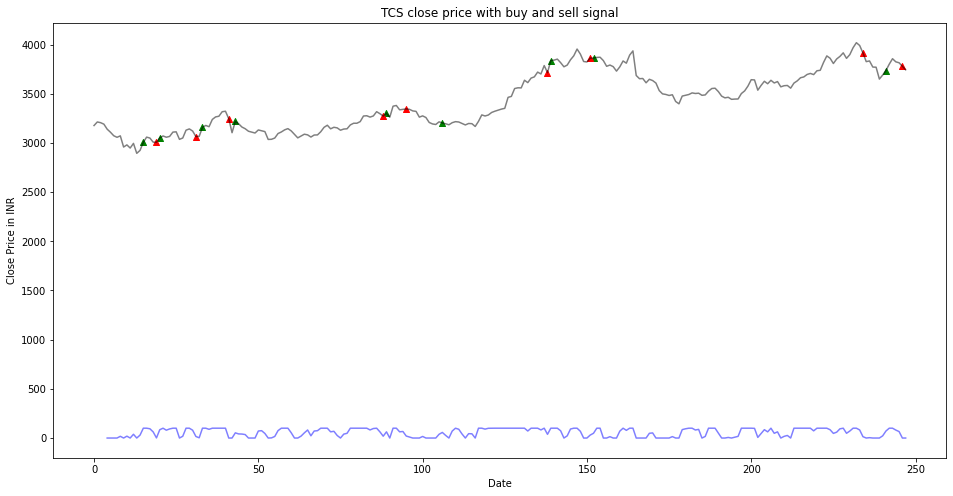

In [86]:

plt.figure(figsize=(16,8))
plt.title('TCS close price with buy and sell signal')
plt.plot(df['Close'],alpha=0.5,label='CLOSE',color='black')
plt.plot(df['Stockastic'],alpha=0.5,label='Stockastic',color='blue')
plt.scatter(df.index,df['buy_stock'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df.index,df['sell_stock'],color='red',label='Sell signal',marker='^',alpha=1)

plt.xlabel('Date')
plt.ylabel('Close Price in INR')

plt.show()